In [1]:
from helpers import get_sides, CONST_WIDTH
from matplotlib import pyplot as plt
import numpy as np

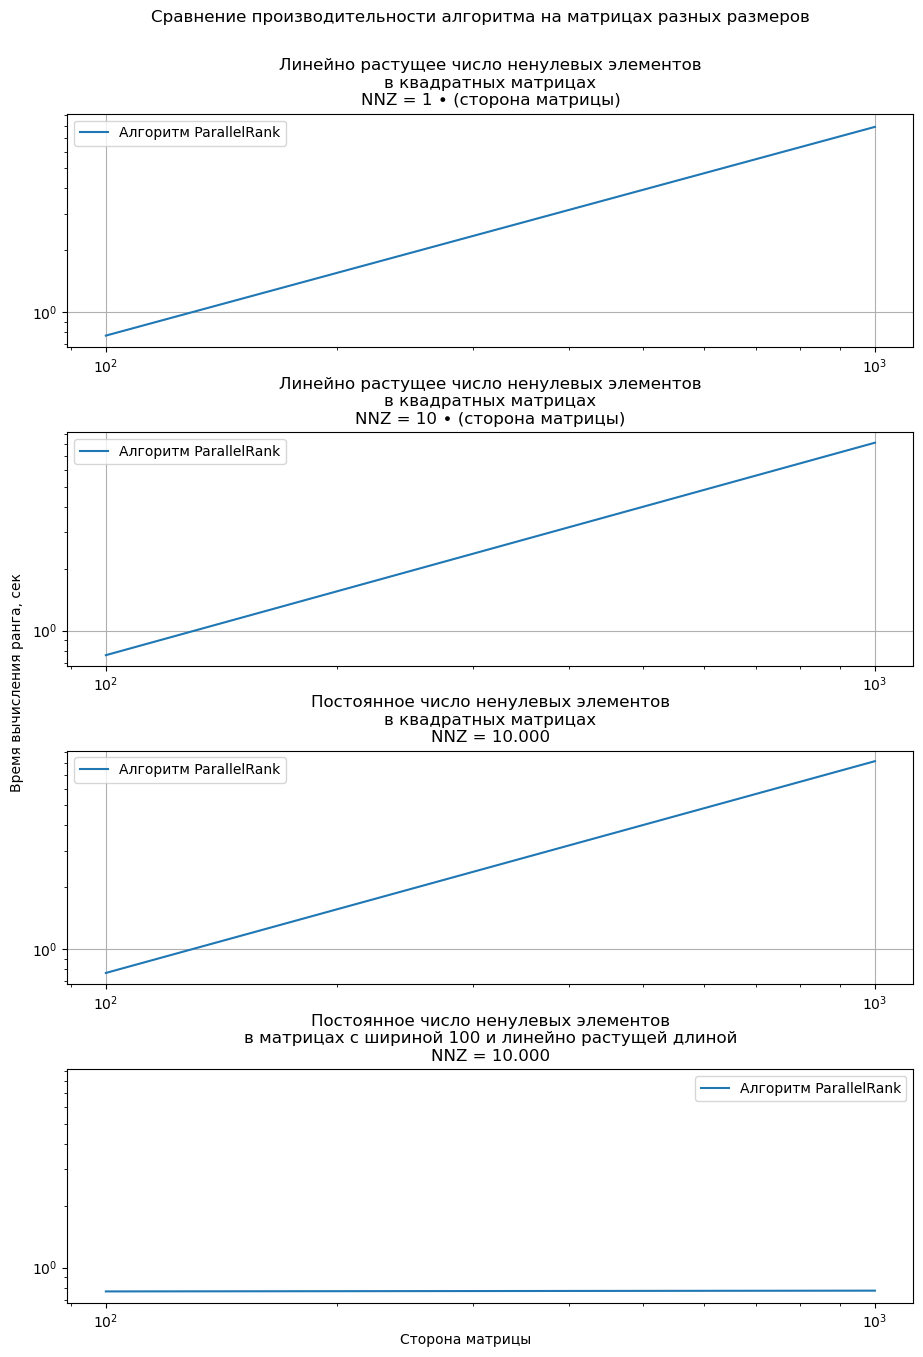

In [29]:
main_dir = "parallelrank_perfs"
sides = get_sides(True)

linear_growth_width = []
linear_growth_1 = []
linear_growth_10 = []
const_nnz = []

def get_measurement(main_dir, width, height, nnz):
    return np.load("../{}/algorithm_time_{}x{}_nnz_{}.npy".format(main_dir, width, height, nnz))

# Aggregate performance measurements
for side in sides:
    nnz, shape = (CONST_WIDTH * CONST_WIDTH, (CONST_WIDTH, side))
    width, height = shape
    linear_growth_width.append(get_measurement(main_dir, width, height, nnz))
    
    nnz, shape = (1 * side, (side, side))
    width, height = shape
    linear_growth_1.append(get_measurement(main_dir, width, height, nnz))
    
    nnz, shape = (10 * side, (side, side))
    width, height = shape
    linear_growth_10.append(get_measurement(main_dir, width, height, nnz))
    
    nnz, shape = (CONST_WIDTH * CONST_WIDTH, (side, side))
    width, height = shape
    const_nnz.append(get_measurement(main_dir, width, height, nnz))


fig, axs = plt.subplots(4, figsize=(10, 14), sharey=True)
fig.suptitle('Сравнение производительности алгоритма на матрицах разных размеров')
fig.tight_layout(pad=4.0)
fig.text(0.03, 0.5, 'Время вычисления ранга, сек', va='center', rotation='vertical')
fig.text(0.42, 0.03, 'Сторона матрицы', va='center', rotation='horizontal')
axs[0].plot(sides, linear_growth_1, label="Алгоритм ParallelRank")
axs[0].title.set_text('Линейно растущее число ненулевых элементов\nв квадратных матрицах\nNNZ = 1 ∙ (сторона матрицы)')

axs[1].plot(sides, linear_growth_10, label="Алгоритм ParallelRank")
axs[1].title.set_text('Линейно растущее число ненулевых элементов\nв квадратных матрицах\nNNZ = 10 ∙ (сторона матрицы)')

axs[2].plot(sides, const_nnz, label="Алгоритм ParallelRank")
axs[2].title.set_text('Постоянное число ненулевых элементов\nв квадратных матрицах\nNNZ = 10.000')

axs[3].plot(sides, linear_growth_width, label="Алгоритм ParallelRank")
axs[3].title.set_text('Постоянное число ненулевых элементов\nв матрицах с шириной 100 и линейно растущей длиной\nNNZ = 10.000')


for i in range(4):
    axs[i].grid()
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].legend()


plt.grid()
plt.show()